<a href="https://colab.research.google.com/github/npvinh2410/Data-Analyst/blob/main/PTDLUD_7_BTVN_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nhóm: PTDLUD#7

Thành viên:

- Ninh Việt Tiến - 19120680

- Lại Khánh Toàn - 1912089

- Trần Trọng Trí - 19120693

- Nguyễn Phước Vinh - 19120719

1 Các giả thuyết cần có của dữ liệu để thực hiện one-sample T test là:

- Kiểm chứng giá trị trung
bình một biến với một giá trị
- Null Hypothesis (Ho): Giá trị trung bình bằng với giá trị giả thuyết
muốn kiểm chứng
- Alternative Hypothesis (H): Giá trị trung bình khác với giá trị giả thuyết


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests
from collections import Counter

2. a Kiểm tra xem dữ liệu có phân phối chuẩn không?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


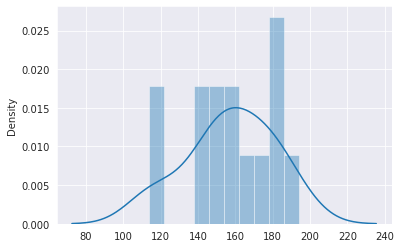

In [42]:
df2=[183, 152, 178, 157, 194, 163, 144, 114, 178, 152, 118, 158, 172,
138]
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(df2,bins=10)



In [43]:
print('Giá trị mean của df: ',np.mean(df2))

Giá trị mean của df:  157.21428571428572


In [44]:
print('Giá trị median của df: ',np.median(df2))

Giá trị median của df:  157.5


In [45]:
data = Counter(df2)
data.most_common()

[(152, 2),
 (178, 2),
 (183, 1),
 (157, 1),
 (194, 1),
 (163, 1),
 (144, 1),
 (114, 1),
 (118, 1),
 (158, 1),
 (172, 1),
 (138, 1)]

Kết luận: dựa vào hình dạng đồ thị và giá trị mean, median, mode khác nhau nên ta kết luận rằng đồ thị không đạt phân phối chuẩn

2. b Hãy Kiểm tra xem population mean có nhỏ hơn 165 với significance level 0.05 hay không? Giải thích và lựa chọn loại kiểm chứng phù hợp

Loại kiểm chứng: One sample t-test vì đây là kiểm tra trung bình một biến với giá trị giả thuyết và giá trị mẫu nhỏ hơn 30

Giả thuyết:
- Null hypothesis (H0) Giá trị population mean lớn hơn hoặc bằng 165 
- Alternative hypothesis (H) Giá trị population mean nhỏ hơn 165


In [46]:
tset, pval = ttest_1samp(df2,165)
pval = pval/2 # Since alternative hypothesis is one tailed, We need to divide the p value by 2.
print('P value:', pval)
if pval<0.05:
  print("p_vlaue < 0.05. Chúng ta phủ nhận kết quả H0, population mean nhỏ hơn 165")
else:
  print("p_value >= 0.05. Chúng ta chấp nhận kết quả H0, population mean lớn hơn hoặc bằng 165")

P value: 0.11787740505906531
p_value >= 0.05. Chúng ta chấp nhận kết quả H0, population mean lớn hơn hoặc bằng 165


3. Tập dữ liệu chứa chiều dài và chiều rộng của đài hoa và cánh hoa của các loài hoa khác nhau. Hãy thử nghiệm independent Test để xem liệu có sự khác biệt đáng kể về chiều rộng lá đài giữa loài Iris-setosa và Iris-versicolor, lần lượt là các biến “sepal_width” và “species”

Loại kiểm chứng: two sample z-test vì số lượng mẫu lớn hơn 30 và kiểm chứng giá trị trung bình của hai biến

Giả thuyết: 
- Null Hypothesis (H): Chiều rộng lá đài của loài Iris-setosa và loài Iris-versicolor là như nhau
- Alterbative Hypothesis (H): Chiều rộng lá đài của loài Iris-setosa và loài Iris-versicolor là khác nhau

In [47]:
df3 = pd.read_csv('Iris_Data.csv')
df3

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
data1 = df3.loc[df3['species'] == 'Iris-setosa', 'sepal_width']
data2 = df3.loc[df3['species'] == 'Iris-versicolor', 'sepal_width']
zt, p = stests.ztest(x1 = data1, x2 = data2, value = 0)
print('P value: ', p)
if p < 0.05:
  print('p_value < 0.05. Phủ nhận H0. Chiều rộng lá đài của loài Iris-setosa và loài Iris-versicolor là khác nhau')
else:
  print('p_value >= 0.05. Chấp nhận H0. Chiều rộng lá đài của loài Iris-setosa và loài Iris-versicolor là như nhau')

P value:  1.651247323451764e-20
p_value < 0.05. Phủ nhận H0. Chiều rộng lá đài của loài Iris-setosa và loài Iris-versicolor là khác nhau


4. Giả sử chúng ta đã thu thập một mẫu ngẫu nhiên gồm 31 thanh năng lượng từ một số cửa hàng khác nhau để đại diện cho số lượng thanh năng lượng có sẵn cho người tiêu dùng nói chung. Các nhãn trên thanh ghi rằng mỗi thanh chứa 20 gam protein

Energy Bar - Grams of Protein

20.70 27.46 22.15 19.85 21.29 24.75

20.75 22.91 25.34 20.33 21.54 21.08

22.14 19.56 21.10 18.04 24.12 19.95

19.72 18.28 16.26 17.46 20.53 22.12

25.06 22.44 19.08 19.88 21.39 22.33 25.79

Quan sát bảng trên, ta thấy một số thanh có ít hơn 20 gam protein, một số thì nhiều hơn. Bạn có
thể nghĩ rằng dữ liệu hỗ trợ cho ý tưởng: các nhãn là chính xác. Cũng có thể có ý kiến không
đồng ý nhận định này. Hãy lựa chọn và thực hiện một phương pháp kiểm chứng hợp lý để đưa
để mọi người đưa ra quyết định giống nhau trên cùng một tập giá trị dữ liệu. Giải thích kết quả.

Loại kiểm chứng: one sample z-test vì số lượng mẫu lớn hơn 30 và kiểm tra trung bình một biến với một giá trị giả thuyết

Giả thuyết:

Null Hypothesis (H0): mỗi thanh năng lượng chứa đúng 20 gam protein.

Alternative Hypothesis (H): mỗi thanh năng lượng không chứa đúng 20 gam protein. 

In [49]:
df4 = [20.70, 27.46,22.15, 19.85, 21.29, 24.75,
        20.75, 22.91, 25.34, 20.33, 21.54, 21.08,
        22.14, 19.56, 21.10, 18.04, 24.12, 19.95,
        19.72, 18.28, 16.26, 17.46, 20.53, 22.12,
        25.06, 22.44, 19.08, 19.88, 21.39, 22.33, 25.79]
df4

[20.7,
 27.46,
 22.15,
 19.85,
 21.29,
 24.75,
 20.75,
 22.91,
 25.34,
 20.33,
 21.54,
 21.08,
 22.14,
 19.56,
 21.1,
 18.04,
 24.12,
 19.95,
 19.72,
 18.28,
 16.26,
 17.46,
 20.53,
 22.12,
 25.06,
 22.44,
 19.08,
 19.88,
 21.39,
 22.33,
 25.79]

In [50]:
stat, p = stests.ztest(df4,value=20)
print('P value:', p)
if p < 0.05:
  print("p_value < 0.05. Phủ nhận H0. Mỗi thanh năng lượng không chứa đúng 20 gam protein")
else:
  print("p_value >= 0.05. Chấp nhận H0. Mỗi thanh năng lượng chứa đúng 20 gam protein")

P value: 0.0021634067481781484
p_value < 0.05. Phủ nhận H0. Mỗi thanh năng lượng không chứa đúng 20 gam protein


5 Thử nghiệm được thực hiện hai lần, trước và sau khi điều trị lâm sàng nhất định và chúng tôi muốn biết liệu có sự khác biệt đáng kể sau khi điều trị hay không. (Cơ sở dữ liệu có tính chất minh hoạ). Dữ liệu chứa các chỉ số BG (tính bằng mg / dL) cho 40 người mắc bệnh tiểu đường tại các thời điểm khác nhau.

In [51]:
df5 = pd.read_csv('DuongHuyet db.csv')
df5

,Person ID,BG 1,BG 2,BG 3
0,0,89.162573,94.023517,94.594145
1,1,90.857629,95.273755,95.040646
2,2,94.912999,96.612870,95.200472
3,3,95.254064,96.818673,97.205801
4,4,97.136291,97.760342,98.428840
5,5,99.809999,99.169227,98.867769
6,6,101.094087,99.579283,99.790581
7,7,101.531428,99.661758,100.669928
8,8,101.981148,100.812359,101.751155
9,9,101.993065,102.274035,101.751638


**- Visualize dữ liệu trong khoảng 5 bin từ 60 đến 160 thể hiện dữ liệu của 2 nhóm trước và sau điều trị (sử dụng màu khác nhau để phân biệt).**

---



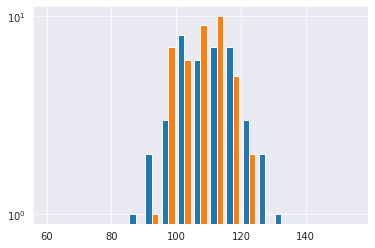

In [52]:

#Vẽ histogram cột 'BG 1' và 'BG 2' đại diện cho chỉ số BG trước và sau khi điều trị

import matplotlib.pyplot as plt
plt.hist([df5['BG 1'], df5['BG 2']], bins=range(60,160,5), log=True)
plt.plot()
plt.show()


*Không xét tới cột "BG 3" vì trong đề chỉ đề cập nhóm trước và sau là "BG 1" (màu xanh) và "BG 2"(màu cam)

*Nhận xét: chỉ số BG ở lần đo thứ 2 tập trung hơn so với lần đo thứ nhất

**- Lựa chọn loại kiểm chứng phù hợp để kiểm chứng và giải thích kết quả.**

---



Loại kiểm chứng: two simple z-test vì số lượng mẫu lớn hơn 30 và kiểm chứng giá trị trung bình của hai biến

Giả thuyết:
- Null Hypothesis (H0): Hai giá trị trung bình của 2 lần đo huyết áp là như nhau.
- Alterbative Hypothesis (H): Hai giá trị trung bình của 2 lần đo huyết áp khác nhau.

In [53]:
stat, p = stests.ztest(df5['BG 1'], df5['BG 2'], value=0)

print('P value:', p)
if p < 0.05:
  print('p_value < 0.05. Phủ nhận H0. Hai giá trị trung bình của 2 lần đo huyết áp khác nhau.')
else:
  print('p_value >= 0.05. Chấp nhận H0. Hai giá trị trung bình của 2 lần đo huyết áp là như nhau.')

P value: 0.3033235099948711
p_value >= 0.05. Chấp nhận H0. Hai giá trị trung bình của 2 lần đo huyết áp là như nhau.
